In [21]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ast
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import nltk
from nltk.text import Text
from datetime import datetime, timedelta

In [24]:
import string


In [25]:
symbolset = string.punctuation

In [2]:
file = ("../Pat/reddit_wallstreetbets.db")

In [3]:
con = sqlite3.connect(file)

In [4]:
cur = con.cursor()

In [5]:
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

In [6]:
table_list

[('new_posts',), ('post_stats',)]

In [9]:
df_new_posts = pd.read_sql_query('SELECT * FROM new_posts', con)

In [10]:
df_post_stats = pd.read_sql_query('SELECT * FROM post_stats', con)

In [11]:
df_new_posts

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments
0,0,No,"Did this today, what do y’all think?",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/q8wj4gnmnmu71.jpg,Meme,"""2021-10-20T15:55:24",99,29,Cintre,61710,26091,662.870045,14,94,7
1,1,No,Heron Therapeutics (HRTX) My Unicorn,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:54:25",99,88,Born-Ad-413,34,87,173.186914,1,67,3
2,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,2954,4259,1618.662336,2,75,9
3,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,12425,11004,1861.732471,1,53,18
4,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,15608,4904,2034.134827,5,78,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,4164,Yes,The climb in gold prices accompanies other sig...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.wsj.com/articles/inflation-surge-p...,News,"""2021-11-15T20:36:15",99,51,Fuzzy-Temperature541,714,87,225.944020,5,86,3
4165,4165,Yes,Green Bay Packers x NFL x Wallstreetbets Colab...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.packers.com/news/green-bay-packers...,News,"""2021-11-15T20:31:11",4,59,adnelik,543,4941,564.744193,4,83,3
4166,4166,Yes,Restaurant Brands buying Firehouse Subs for US...,https://old.reddit.com/r/wallstreetbets/commen...,https://globalnews.ca/news/8374144/firehouse-s...,News,"""2021-11-15T20:23:55",7,72,WARRENBUFFETT0212,8393,271,287.094979,3,80,11
4167,4167,Yes,"Alibaba, limp dick pattern bout to erect!!",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/21jxgaotitz71.jpg,Technical Analysis,"""2021-11-15T20:21:34",0,8,Former-Bumblebee-311,234,22,290.885757,130,96,31


In [13]:
title = df_new_posts.title

In [14]:
title

0                    Did this today, what do y’all think?
1                    Heron Therapeutics (HRTX) My Unicorn
2       China Evergrande Ends Talks on Hopson Deal, As...
3                  Impact of Federal Legalization on TLRY
4       Novavax $NVAX is being investigated after big ...
                              ...                        
4164    The climb in gold prices accompanies other sig...
4165    Green Bay Packers x NFL x Wallstreetbets Colab...
4166    Restaurant Brands buying Firehouse Subs for US...
4167           Alibaba, limp dick pattern bout to erect!!
4168    Republican Lawmakers File Bill To Tax And Regu...
Name: title, Length: 4169, dtype: object

In [15]:
title[0]

'Did this today, what do y’all think?'

In [17]:
title.index('Did this today, what do y’all think?')

TypeError: 'RangeIndex' object is not callable

In [26]:
n = len(title)
df_new_posts["propernouns"] = np.zeros(n)
df_new_posts["numbers"] = np.zeros(n)
df_new_posts["hashtags"] = np.zeros(n)
df_new_posts["symbols"] = np.zeros(n)
for i in range(n):
    text = title[i]
    words = nltk.word_tokenize(text)
    taggedtoken = nltk.pos_tag(words)
    NPcount = 0
    NUMcount = 0
    SYMcount = 0
    HASHcount = 0
    for word in taggedtoken:
        if word[1] == "NNP" or word[1] == "NNPS":
            NPcount += 1
        if word[1] == "JJ" or word[1] == "CD":
            NUMcount += 1
        if word[0] == "#":
            HASHcount += 1
        if word[0] in symbolset :
            SYMcount += 1
    df_new_posts["propernouns"][i] = NPcount
    df_new_posts["numbers"][i] = NUMcount
    df_new_posts["hashtags"][i] = HASHcount
    df_new_posts["symbols"][i] = SYMcount
    
    

<ipython-input-26-9c478a38fd32>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_posts["propernouns"][i] = NPcount
<ipython-input-26-9c478a38fd32>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_posts["numbers"][i] = NUMcount
<ipython-input-26-9c478a38fd32>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_posts["hashtags"][i] = HASHcount
<ipython-input-26-9c478a38fd32>:26: SettingWithCopyWarning: 
A value is tr

In [27]:
df_new_posts

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments,propernouns,numbers,hashtags,symbols
0,0,No,"Did this today, what do y’all think?",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/q8wj4gnmnmu71.jpg,Meme,"""2021-10-20T15:55:24",99,29,Cintre,61710,26091,662.870045,14,94,7,1.0,0.0,0.0,2.0
1,1,No,Heron Therapeutics (HRTX) My Unicorn,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:54:25",99,88,Born-Ad-413,34,87,173.186914,1,67,3,3.0,1.0,0.0,2.0
2,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,2954,4259,1618.662336,2,75,9,7.0,0.0,0.0,1.0
3,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,12425,11004,1861.732471,1,53,18,3.0,0.0,0.0,0.0
4,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,15608,4904,2034.134827,5,78,10,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,4164,Yes,The climb in gold prices accompanies other sig...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.wsj.com/articles/inflation-surge-p...,News,"""2021-11-15T20:36:15",99,51,Fuzzy-Temperature541,714,87,225.944020,5,86,3,0.0,1.0,0.0,0.0
4165,4165,Yes,Green Bay Packers x NFL x Wallstreetbets Colab...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.packers.com/news/green-bay-packers...,News,"""2021-11-15T20:31:11",4,59,adnelik,543,4941,564.744193,4,83,3,8.0,2.0,0.0,2.0
4166,4166,Yes,Restaurant Brands buying Firehouse Subs for US...,https://old.reddit.com/r/wallstreetbets/commen...,https://globalnews.ca/news/8374144/firehouse-s...,News,"""2021-11-15T20:23:55",7,72,WARRENBUFFETT0212,8393,271,287.094979,3,80,11,5.0,2.0,0.0,2.0
4167,4167,Yes,"Alibaba, limp dick pattern bout to erect!!",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/21jxgaotitz71.jpg,Technical Analysis,"""2021-11-15T20:21:34",0,8,Former-Bumblebee-311,234,22,290.885757,130,96,31,1.0,1.0,0.0,3.0


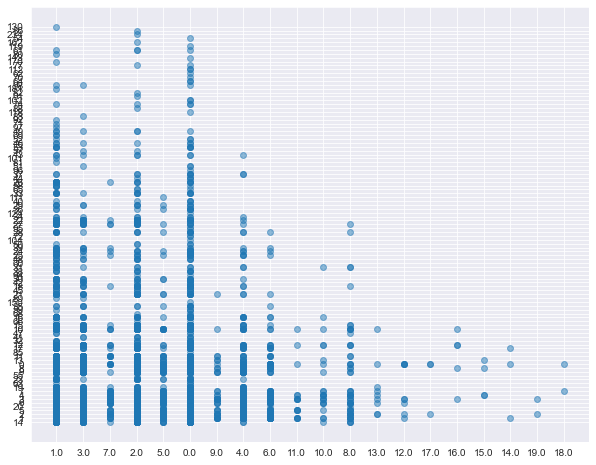

In [31]:
df_new_posts = df_new_posts.astype(str)

plt.figure(figsize=(10,8))

X = df_new_posts["upvotes"]
y = df_new_posts["propernouns"]
plt.scatter(y,X, alpha = 0.5)
plt.show()